In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar archivo de datos
df = pd.read_csv("trim_galore.tsv", sep="\t")  # Usa sep="," si es CSV

# Separar la columna 'Sample' en 'Sample_ID' y 'Adapter_Type'
df[['Sample_ID', 'Adapter_Type']] = df['Sample'].str.split(' - ', expand=True)

# Eliminar la columna original
df = df.drop(columns=['Sample'])

# Reorganizar el dataframe al formato largo para graficar
long_df = df.melt(id_vars=['Sample_ID', 'Adapter_Type'], 
                  var_name='Position_bp', 
                  value_name='Percent')

# Convertir posiciones a numérico
long_df['Position_bp'] = long_df['Position_bp'].astype(int)



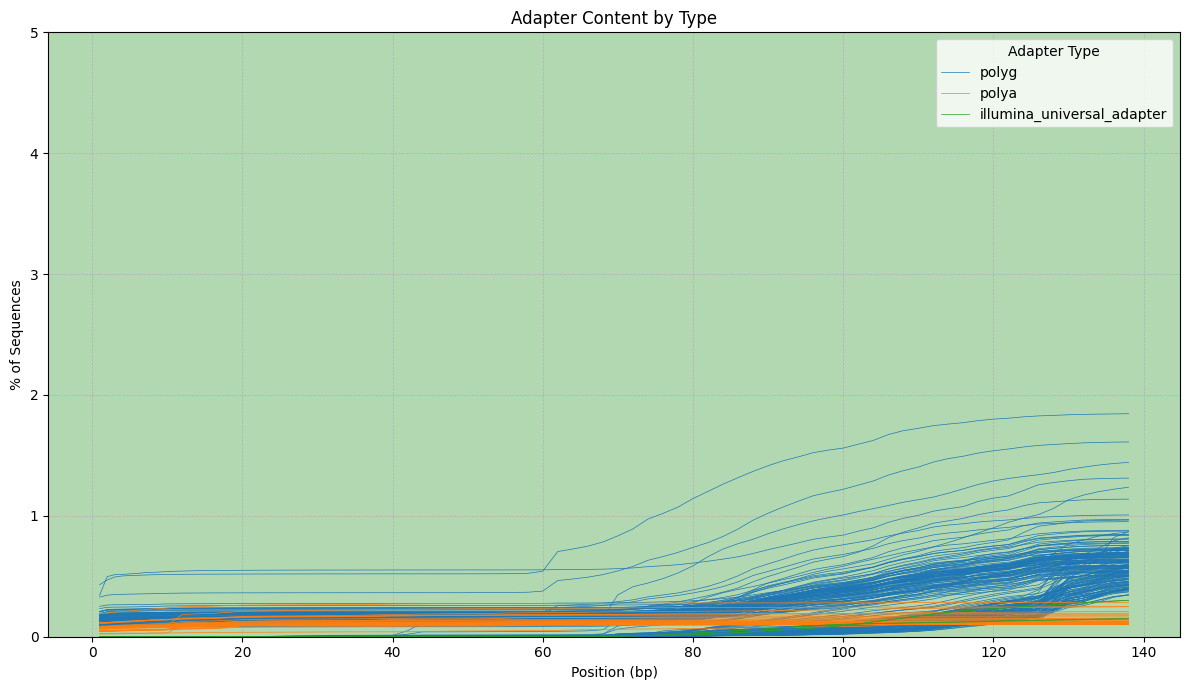

In [4]:
# Crear el gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(data=long_df, x='Position_bp', y='Percent', hue='Adapter_Type', estimator=None, units='Sample_ID', lw=0.5)

# Estética tipo FastQC
plt.title('Adapter Content by Type')
plt.xlabel('Position (bp)')
plt.ylabel('% of Sequences')
plt.ylim(0, 5)
plt.axhspan(0, 20, facecolor='green', alpha=0.3)
plt.axhspan(20, 40, facecolor='orange', alpha=0.1)
plt.axhspan(40, 100, facecolor='red', alpha=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Adapter Type')
plt.tight_layout()
plt.show()

In [5]:
def preparar_datos(file):
    df = pd.read_csv(file, sep="\t")
    df[['Sample_ID', 'Adapter_Type']] = df['Sample'].str.split(' - ', expand=True)
    df = df.drop(columns=['Sample'])
    long_df = df.melt(id_vars=['Sample_ID', 'Adapter_Type'], 
                      var_name='Position_bp', 
                      value_name='Percent')
    long_df['Position_bp'] = long_df['Position_bp'].astype(int)
    return long_df

# --- Cargar los tres archivos ---
df_raw = preparar_datos("raw.tsv")
df_trimmo = preparar_datos("trimmomatic.tsv")
df_galore = preparar_datos("trim_galore.tsv")


In [6]:
df_fastp = df_galore.copy()
df_fastp['Percent'] = 0.1

In [7]:
sns.set(style="whitegrid")

# Definir colores personalizados para adaptadores
adapter_palette = {
    "illumina_small_rna_3'_adapter (R1)": "#ff7f0e",   # azul
    "illumina_small_rna_5'_adapter (R2)": "#9467bd",   # naranja
    "illumina_universal_adapter": "#2ca02c",      # verde
    "polya": "#d62728",                           # rojo
    "polyg": "#1f77b4",                           # púrpura
}

adapter_rename = {
    "illumina_small_rna_3'_adapter": "illumina_small_rna_3'_adapter (R1)",
    "illumina_small_rna_5'_adapter": "illumina_small_rna_5'_adapter (R2)",
    "illumina_universal_adapter": "illumina_universal_adapter",
    "polya": "polya",
    "polyg": "polyg"
}

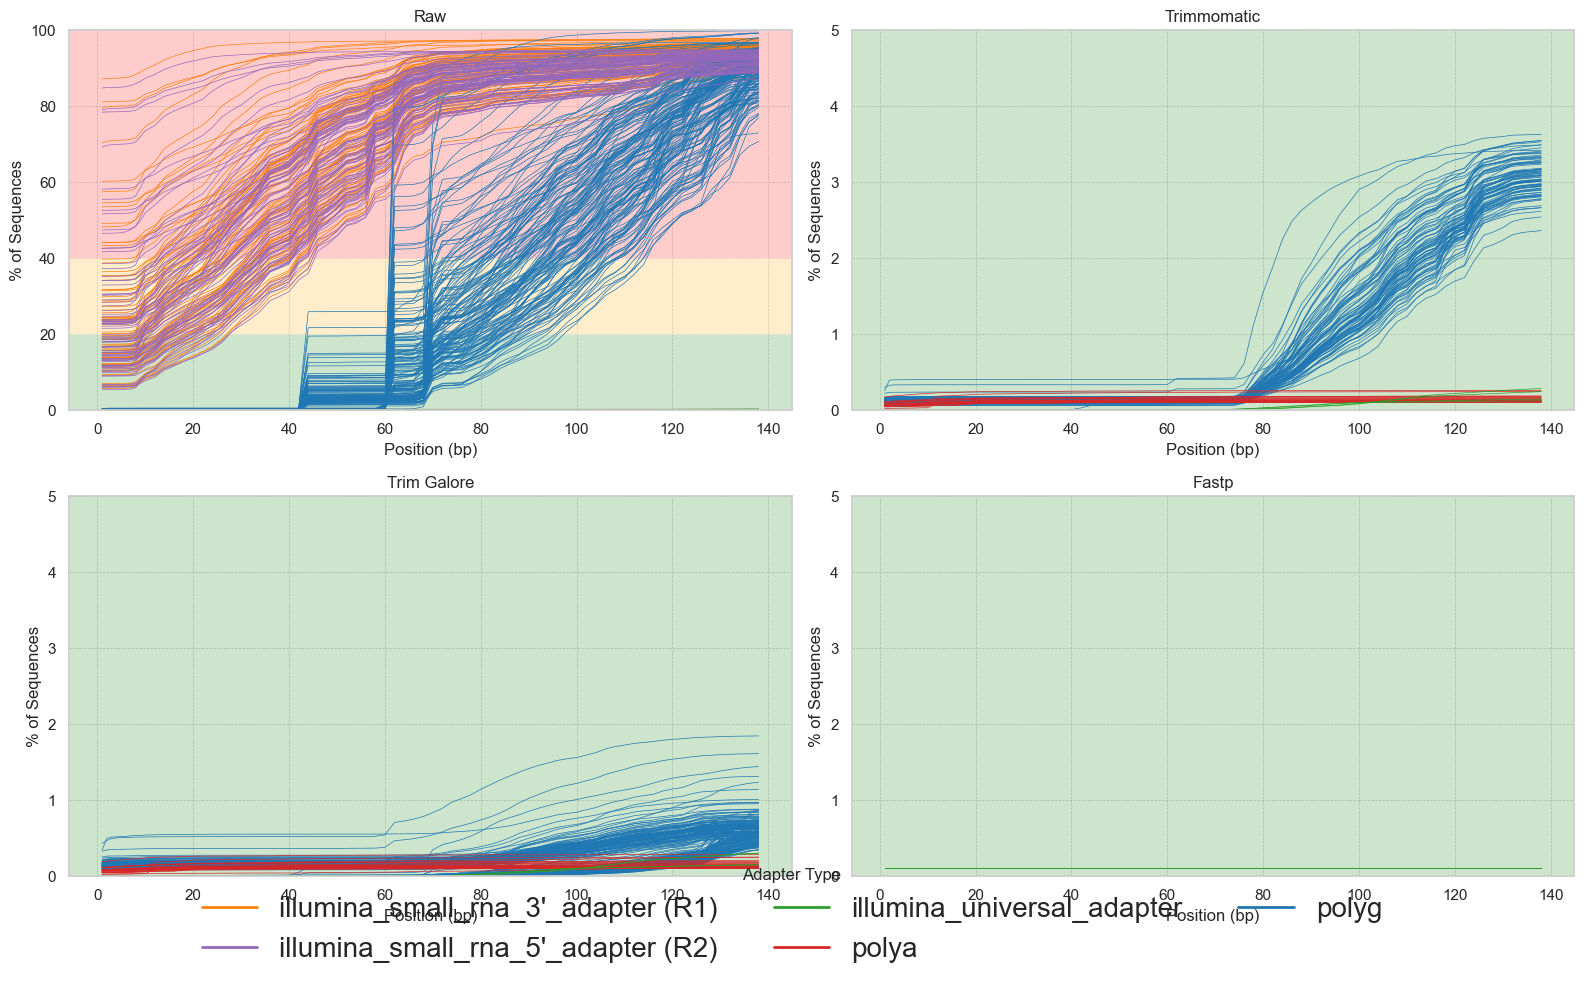

In [8]:
def plot_panel(ax, data, title, y_max):
    data['Adapter_Type'] = data['Adapter_Type'].map(adapter_rename)
    sns.lineplot(data=data, x='Position_bp', y='Percent', hue='Adapter_Type',
                 estimator=None, units='Sample_ID', lw=0.5, ax=ax,
                 palette=adapter_palette, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Position (bp)')
    ax.set_ylabel('% of Sequences')
    #y_max = min(100, data['Percent'].max() * 1.1)
    ax.set_ylim(0, y_max)
    ax.axhspan(0, 20, facecolor='green', alpha=0.2)
    ax.axhspan(20, 40, facecolor='orange', alpha=0.2)
    ax.axhspan(40, y_max, facecolor='red', alpha=0.2)
    ax.grid(True, linestyle='--', linewidth=0.5)


# --- Crear figura 2x2 ---
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plot_panel(axs[0,0], df_raw, "Raw", 100)
plot_panel(axs[0,1], df_trimmo, "Trimmomatic", 5)
plot_panel(axs[1,0], df_galore, "Trim Galore", 5)
plot_panel(axs[1,1], df_fastp, "Fastp", 5)


# Leyenda general
handles = [plt.Line2D([0], [0], color=color, lw=2) for adapter, color in adapter_palette.items()]
labels = list(adapter_palette.keys())
fig.legend(handles, labels, loc='lower center', ncol=3, title="Adapter Type", frameon=False, fontsize=20)


plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
